# Pandas Operations: grouping, merging, loading, and plotting!

In this lecture/notebook, we will introduce some more advanced (and essential) `pandas` operations, as well as briefly introduce fossil fuel and industrial emissions.

We especially will focus on:

- Grouping DataFrames with `groupby`
- Merging DataFrames/Series with `merge`
- Very basics of loading a csv file
- Introduce pandas plotting via matplotlib

To follow along with the first section, download the files:

- `Display_Counties.shp`
- `corn_area_harvested.csv`


In [208]:
#Import our basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
#And geopandas, which we'll use in passing:
import geopandas as gpd

## Using `groupby` with pandas

1. *Split* DataFrame into groups based on one or more *keys*, along a particular axis (rows, `axis = 0`; or colums, `axis = 1`)
2. Apply a function to each group, producing a new value
3. Comine results into a new object

<img src="split_apply_flow.jpg" alt="drawing" style="width:500px;"/>

Let's demo with a simple DataFrame...

In [210]:
#Area planted dataframe from before

data = {'state': ['Arizona', 'Arizona', 'Arizona', 'Arizona',
                  'California', 'California', 'California', 'California', 'Iowa', 'Iowa', 'Iowa', 'Iowa'],
        'year': [2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022],
        'area planted': [637, 573, 616, 630, 2983, 2621, 2550, 2274, 23935, 24330, 24330, 24150]}
        
df = pd.DataFrame(data)
df

,state,year,area planted
0,Arizona,2019,637
1,Arizona,2020,573
2,Arizona,2021,616
3,Arizona,2022,630
4,California,2019,2983
5,California,2020,2621
6,California,2021,2550
7,California,2022,2274
8,Iowa,2019,23935
9,Iowa,2020,24330


In [211]:
#Let's say we want the mean of our data grouped by state
df_grouped = df.groupby('state')

#Now we have a GroupBy object:
df_grouped

In [214]:
#Count how many are in each group:
df_grouped.size()

#Or:
#df_grouped.count()

state
Arizona       4
California    4
Iowa          4
dtype: int64

In [218]:
#And take the means:
df_grouped.mean()

#Try: sum(), cumsum()

,year,area planted
state,,
Arizona,2020.5,614.00
California,2020.5,2607.00
Iowa,2020.5,24186.25


In [219]:
#Note that state is now our index. To reset to a column:
#############

df_grouped.mean().reset_index()

,state,year,area planted
0,Arizona,2020.5,614.00
1,California,2020.5,2607.00
2,Iowa,2020.5,24186.25


#### Group by multiple keys:

In [220]:
df_grouped = df.groupby(['state', 'year'])

In [221]:
#We get mean by two keys, and note the object that is created is a DataFrame
df_means = df_grouped.mean()
df_means

area planted
state      year              
Arizona    2019         637.0
           2020         573.0
           2021         616.0
           2022         630.0
California 2019        2983.0
           2020        2621.0
           2021        2550.0
           2022        2274.0
Iowa       2019       23935.0
           2020       24330.0
           2021       24330.0
           2022       24150.0

In [222]:
#The above Dataframe has a hierarchical index, consisting of unique pairs of the keys:
df_means.index

MultiIndex([(   'Arizona', 2019),
            (   'Arizona', 2020),
            (   'Arizona', 2021),
            (   'Arizona', 2022),
            ('California', 2019),
            ('California', 2020),
            ('California', 2021),
            ('California', 2022),
            (      'Iowa', 2019),
            (      'Iowa', 2020),
            (      'Iowa', 2021),
            (      'Iowa', 2022)],
           names=['state', 'year'])

In [223]:
#Access first level:
df_means.loc['Arizona']

,area planted
year,
2019,637.0
2020,573.0
2021,616.0
2022,630.0


In [225]:
#Access a specific item:
df_means.loc['Arizona',2020]

area planted    573.0
Name: (Arizona, 2020), dtype: float64

In [234]:
#Can access second level of the MultiIndex
#df_means.xs(2019, level=1, drop_level=False)

#Or:
df_means.loc[pd.IndexSlice[:, 2019:2021], :]


area planted
state      year              
Arizona    2019         637.0
           2020         573.0
           2021         616.0
California 2019        2983.0
           2020        2621.0
           2021        2550.0
Iowa       2019       23935.0
           2020       24330.0
           2021       24330.0

In [235]:
#See also:
df_means.loc[pd.IndexSlice[['Arizona', 'California'], 2020:2021], :]

area planted
state      year              
Arizona    2020         573.0
           2021         616.0
California 2020        2621.0
           2021        2550.0

In [236]:
#Various resettings of the index:
#######
df_means.reset_index(level=0)


,state,area planted
year,,
2019,Arizona,637.0
2020,Arizona,573.0
2021,Arizona,616.0
2022,Arizona,630.0
2019,California,2983.0
2020,California,2621.0
2021,California,2550.0
2022,California,2274.0
2019,Iowa,23935.0


In [237]:
df_means.reset_index(level=1)

,year,area planted
state,,
Arizona,2019,637.0
Arizona,2020,573.0
Arizona,2021,616.0
Arizona,2022,630.0
California,2019,2983.0
California,2020,2621.0
California,2021,2550.0
California,2022,2274.0
Iowa,2019,23935.0


In [238]:
df_means.reset_index()

,state,year,area planted
0,Arizona,2019,637.0
1,Arizona,2020,573.0
2,Arizona,2021,616.0
3,Arizona,2022,630.0
4,California,2019,2983.0
5,California,2020,2621.0
6,California,2021,2550.0
7,California,2022,2274.0
8,Iowa,2019,23935.0
9,Iowa,2020,24330.0


In [239]:
#Also: Extract a group from the groupby object:
#######

df_grouped.get_group(('Arizona', 2019))

,state,year,area planted
0,Arizona,2019,637


### Merging DataFrames with `merge` + Loading Files

- Merging is one of the most common operations you will do, and is especially important for merging non-spatial and spatial DataFrames

- We will generally join on one or more **keys**

- Joins can be **left**, **right**, or **inner**

- Merging for DataFrames and GeoDataFrames is very similar


Let's do an example on a **Geo**DataFrame, and corn area harvested data. Your magnanimous instructor has provided two files ready to go...

- `Display_Counties.shp`
- `corn_area_harvested.csv`

In [240]:
#Change path as needed
#Load our GeoDataFrame:
county_gdf = gpd.read_file('US_Display_Shapefiles/Display_Counties.shp')

In [241]:
county_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,Franklin County,AL,Alabama,06,1641845708,32639621,"POLYGON ((714018.351 1287004.948, 714023.415 1..."
1,06,057,01682927,0500000US06057,06057,Nevada,Nevada County,CA,California,06,2480587301,41531993,"POLYGON ((-2136748.905 2086631.894, -2134307.6..."
2,26,031,01622958,0500000US26031,26031,Cheboygan,Cheboygan County,MI,Michigan,06,1852564001,440607445,"POLYGON ((881339.243 2530219.338, 874808.617 2..."
3,29,119,00758518,0500000US29119,29119,McDonald,McDonald County,MO,Missouri,06,1397155452,520251,"POLYGON ((122186.807 1525489.134, 170809.443 1..."
4,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-662580.510 2128502.446, -662501.826..."


<AxesSubplot: >

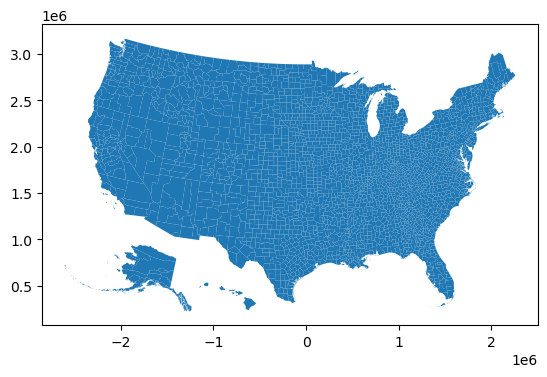

In [242]:
county_gdf.plot()

In [243]:
county_gdf.shape

(3143, 13)

#### Load corn data

In [244]:
## And load the corn Data: Value is area harvested in acres
#######

pd.read_csv('Data/corn_area_harvested.csv')

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,645,25.7
1,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,BULLOCK,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"1,292",25.7
2,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,DALLAS,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"13,876",25.7
3,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,ELMORE,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"2,487",25.7
4,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,GREENE,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,34,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,SOUTHEAST,50,GOSHEN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"29,885",33.6
2639,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,SOUTHEAST,50,LARAMIE,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"17,181",33.6
2640,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,SOUTHEAST,50,NIOBRARA,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,(D),(D)
2641,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,SOUTHEAST,50,PLATTE,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"6,606",33.6


In [245]:
# Load corn data all fixed up: (Value is area harvested in acres)
########

#Change path as needed
corn_df = pd.read_csv('Data/corn_area_harvested.csv', na_values=' (D)', thousands=',',
                      dtype={'State ANSI':str, 'County ANSI':str, 'Value':float}) \
                      [['State', 'State ANSI', 'County ANSI', 'Value']]

In [246]:
corn_df.head()

,State,State ANSI,County ANSI,Value
0,ALABAMA,01,001,645.0
1,ALABAMA,01,011,1292.0
2,ALABAMA,01,047,13876.0
3,ALABAMA,01,051,2487.0
4,ALABAMA,01,063,34.0


In [247]:
corn_df.shape

(2643, 4)

In [248]:
#Note, for example, a groupby operation:
#######

corn_df.groupby('State').sum().sort_values(by='Value', ascending=False) / 1e6

,Value
State,
IOWA,12.969645
ILLINOIS,11.077516
NEBRASKA,9.454193
MINNESOTA,7.789435
INDIANA,5.402922
SOUTH DAKOTA,5.274250
KANSAS,5.232355
MISSOURI,3.363158
OHIO,3.286060


#### Merge on state + county keys:

In [249]:
#Let's merge:
#how options = left, right, inner, outer, cross
############

#Default is inner join:
merged_gdf = county_gdf.merge(corn_df, left_on=['STATEFP', 'COUNTYFP'], right_on=['State ANSI', 'County ANSI'])

merged_gdf.shape

(2643, 17)

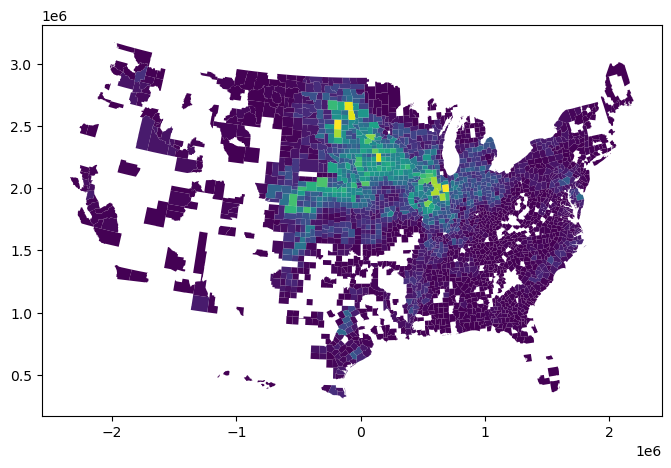

In [250]:
#Quick plot:
merged_gdf.plot(column = 'Value', figsize=(8,6));

In [251]:
#Do a left join:
merged_gdf = county_gdf.merge(corn_df, left_on=['STATEFP', 'COUNTYFP'], right_on=['State ANSI', 'County ANSI'], how='left')

merged_gdf.shape

(3143, 17)

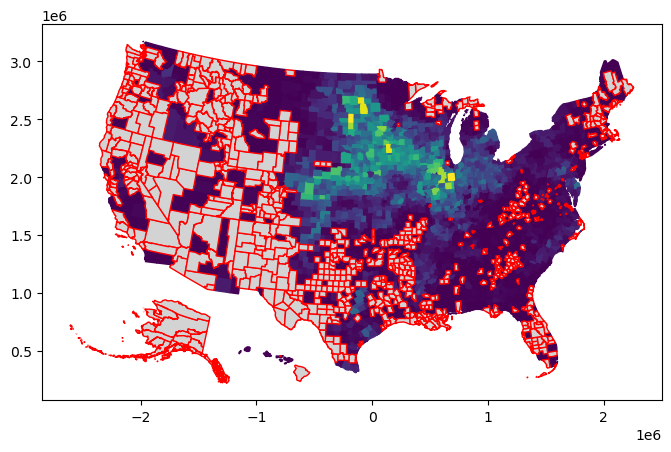

In [257]:
#Let's plot now, showing where data is missing:
###

merged_gdf.plot(column = 'Value', edgecolor='face', figsize=(8,6),
                missing_kwds={"color": "lightgrey", "edgecolor": "red"});

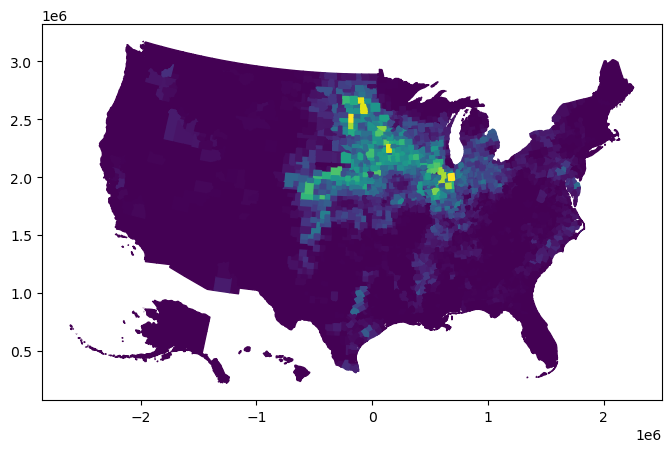

In [259]:
#Alternatively:
#Let's fill the NA values with 0 and plot:

merged_gdf.fillna(0).plot(column = 'Value', edgecolor='face', figsize=(8,6));

#### Merge on a single key:

- We could make a unique FIPS code for each county and merge on this:

In [260]:
#FIPS code for county_gdf:
county_gdf['FIPS'] = county_gdf['STATEFP'] + county_gdf['COUNTYFP']
county_gdf['FIPS']

0       01059
1       06057
2       26031
3       29119
4       31157
        ...  
3138    13301
3139    06023
3140    34023
3141    13311
3142    13189
Name: FIPS, Length: 3143, dtype: object

In [261]:
#And FIPS code for corn_df:
corn_df['FIPS'] = corn_df['State ANSI'] + corn_df['County ANSI']
corn_df['FIPS']

0       01001
1       01011
2       01047
3       01051
4       01063
        ...  
2638    56015
2639    56021
2640    56027
2641    56031
2642    56023
Name: FIPS, Length: 2643, dtype: object

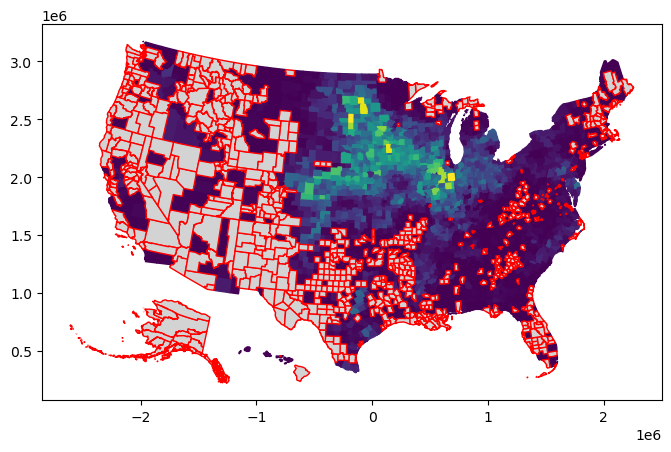

In [262]:
#Do a left join:
merged_gdf = county_gdf.merge(corn_df, on = 'FIPS', how='left')

#And confirm results:
merged_gdf.plot(column = 'Value', edgecolor='face', figsize=(8,6),
                missing_kwds={"color": "lightgrey", "edgecolor": "red"});

#### Some more `groupby()` + `merge()`

In [263]:
#Groupby state and sum:
######

state_sums = merged_gdf.fillna(0).groupby('STATEFP').sum()

#Note: STATEFP is now the index
state_sums.head()

,ALAND,AWATER,Value
STATEFP,,,
01,131175477769,4591897964,240093.0
02,1478942847588,245378425142,0.0
04,294363973043,855871553,30071.0
05,134660767709,3121950081,591131.0
06,403671756816,20293573058,87799.0


In [264]:
#Could reset the index and use as column, or, use right_index = True
#######

state_merged_gdf = county_gdf.merge(state_sums, left_on = 'STATEFP', right_index=True, how='left')

In [265]:
state_merged_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND_x,AWATER_x,geometry,FIPS,ALAND_y,AWATER_y,Value
0,01,059,00161555,0500000US01059,01059,Franklin,Franklin County,AL,Alabama,06,1641845708,32639621,"POLYGON ((714018.351 1287004.948, 714023.415 1...",01059,131175477769,4591897964,240093.0
1,06,057,01682927,0500000US06057,06057,Nevada,Nevada County,CA,California,06,2480587301,41531993,"POLYGON ((-2136748.905 2086631.894, -2134307.6...",06057,403671756816,20293573058,87799.0
2,26,031,01622958,0500000US26031,26031,Cheboygan,Cheboygan County,MI,Michigan,06,1852564001,440607445,"POLYGON ((881339.243 2530219.338, 874808.617 2...",26031,146614937132,103871870536,2167400.0
3,29,119,00758518,0500000US29119,29119,McDonald,McDonald County,MO,Missouri,06,1397155452,520251,"POLYGON ((122186.807 1525489.134, 170809.443 1...",29119,178052333716,2487445715,3363158.0
4,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-662580.510 2128502.446, -662501.826...",31157,198957385713,1371105730,9454193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,13,301,00347777,0500000US13301,13301,Warren,Warren County,GA,Georgia,06,736483608,6034478,"POLYGON ((1208631.184 1239033.811, 1212026.970...",13301,149486624386,4418360134,254505.0
3139,06,023,01681908,0500000US06023,06023,Humboldt,Humboldt County,CA,California,06,9241565229,1253726036,"POLYGON ((-2353743.032 2291080.567, -2352158.0...",06023,403671756816,20293573058,87799.0
3140,34,023,00882230,0500000US34023,34023,Middlesex,Middlesex County,NJ,New Jersey,06,800946845,35291196,"POLYGON ((1784650.785 2126526.072, 1784647.751...",34023,19048916230,3533083369,74795.0
3141,13,311,00326781,0500000US13311,13311,White,White County,GA,Georgia,06,623524633,3917258,"POLYGON ((1099657.475 1359582.593, 1099281.089...",13311,149486624386,4418360134,254505.0


<AxesSubplot: >

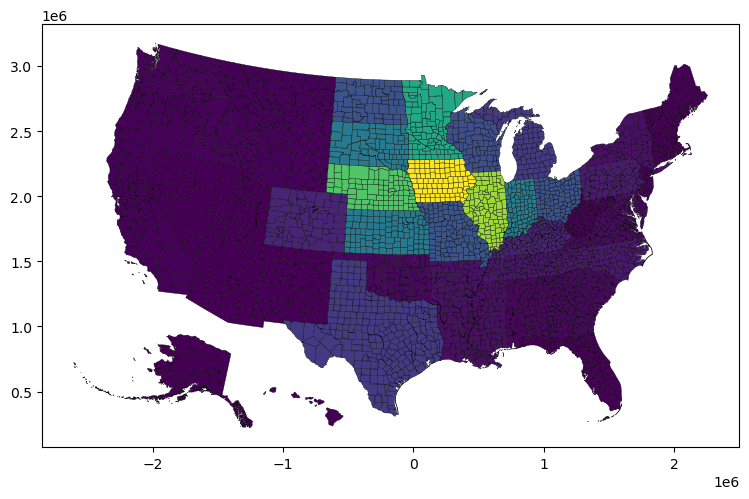

In [266]:
#And Plot:
state_merged_gdf.plot(column = 'Value', edgecolor='black', linewidth=.25, figsize=(9,6))

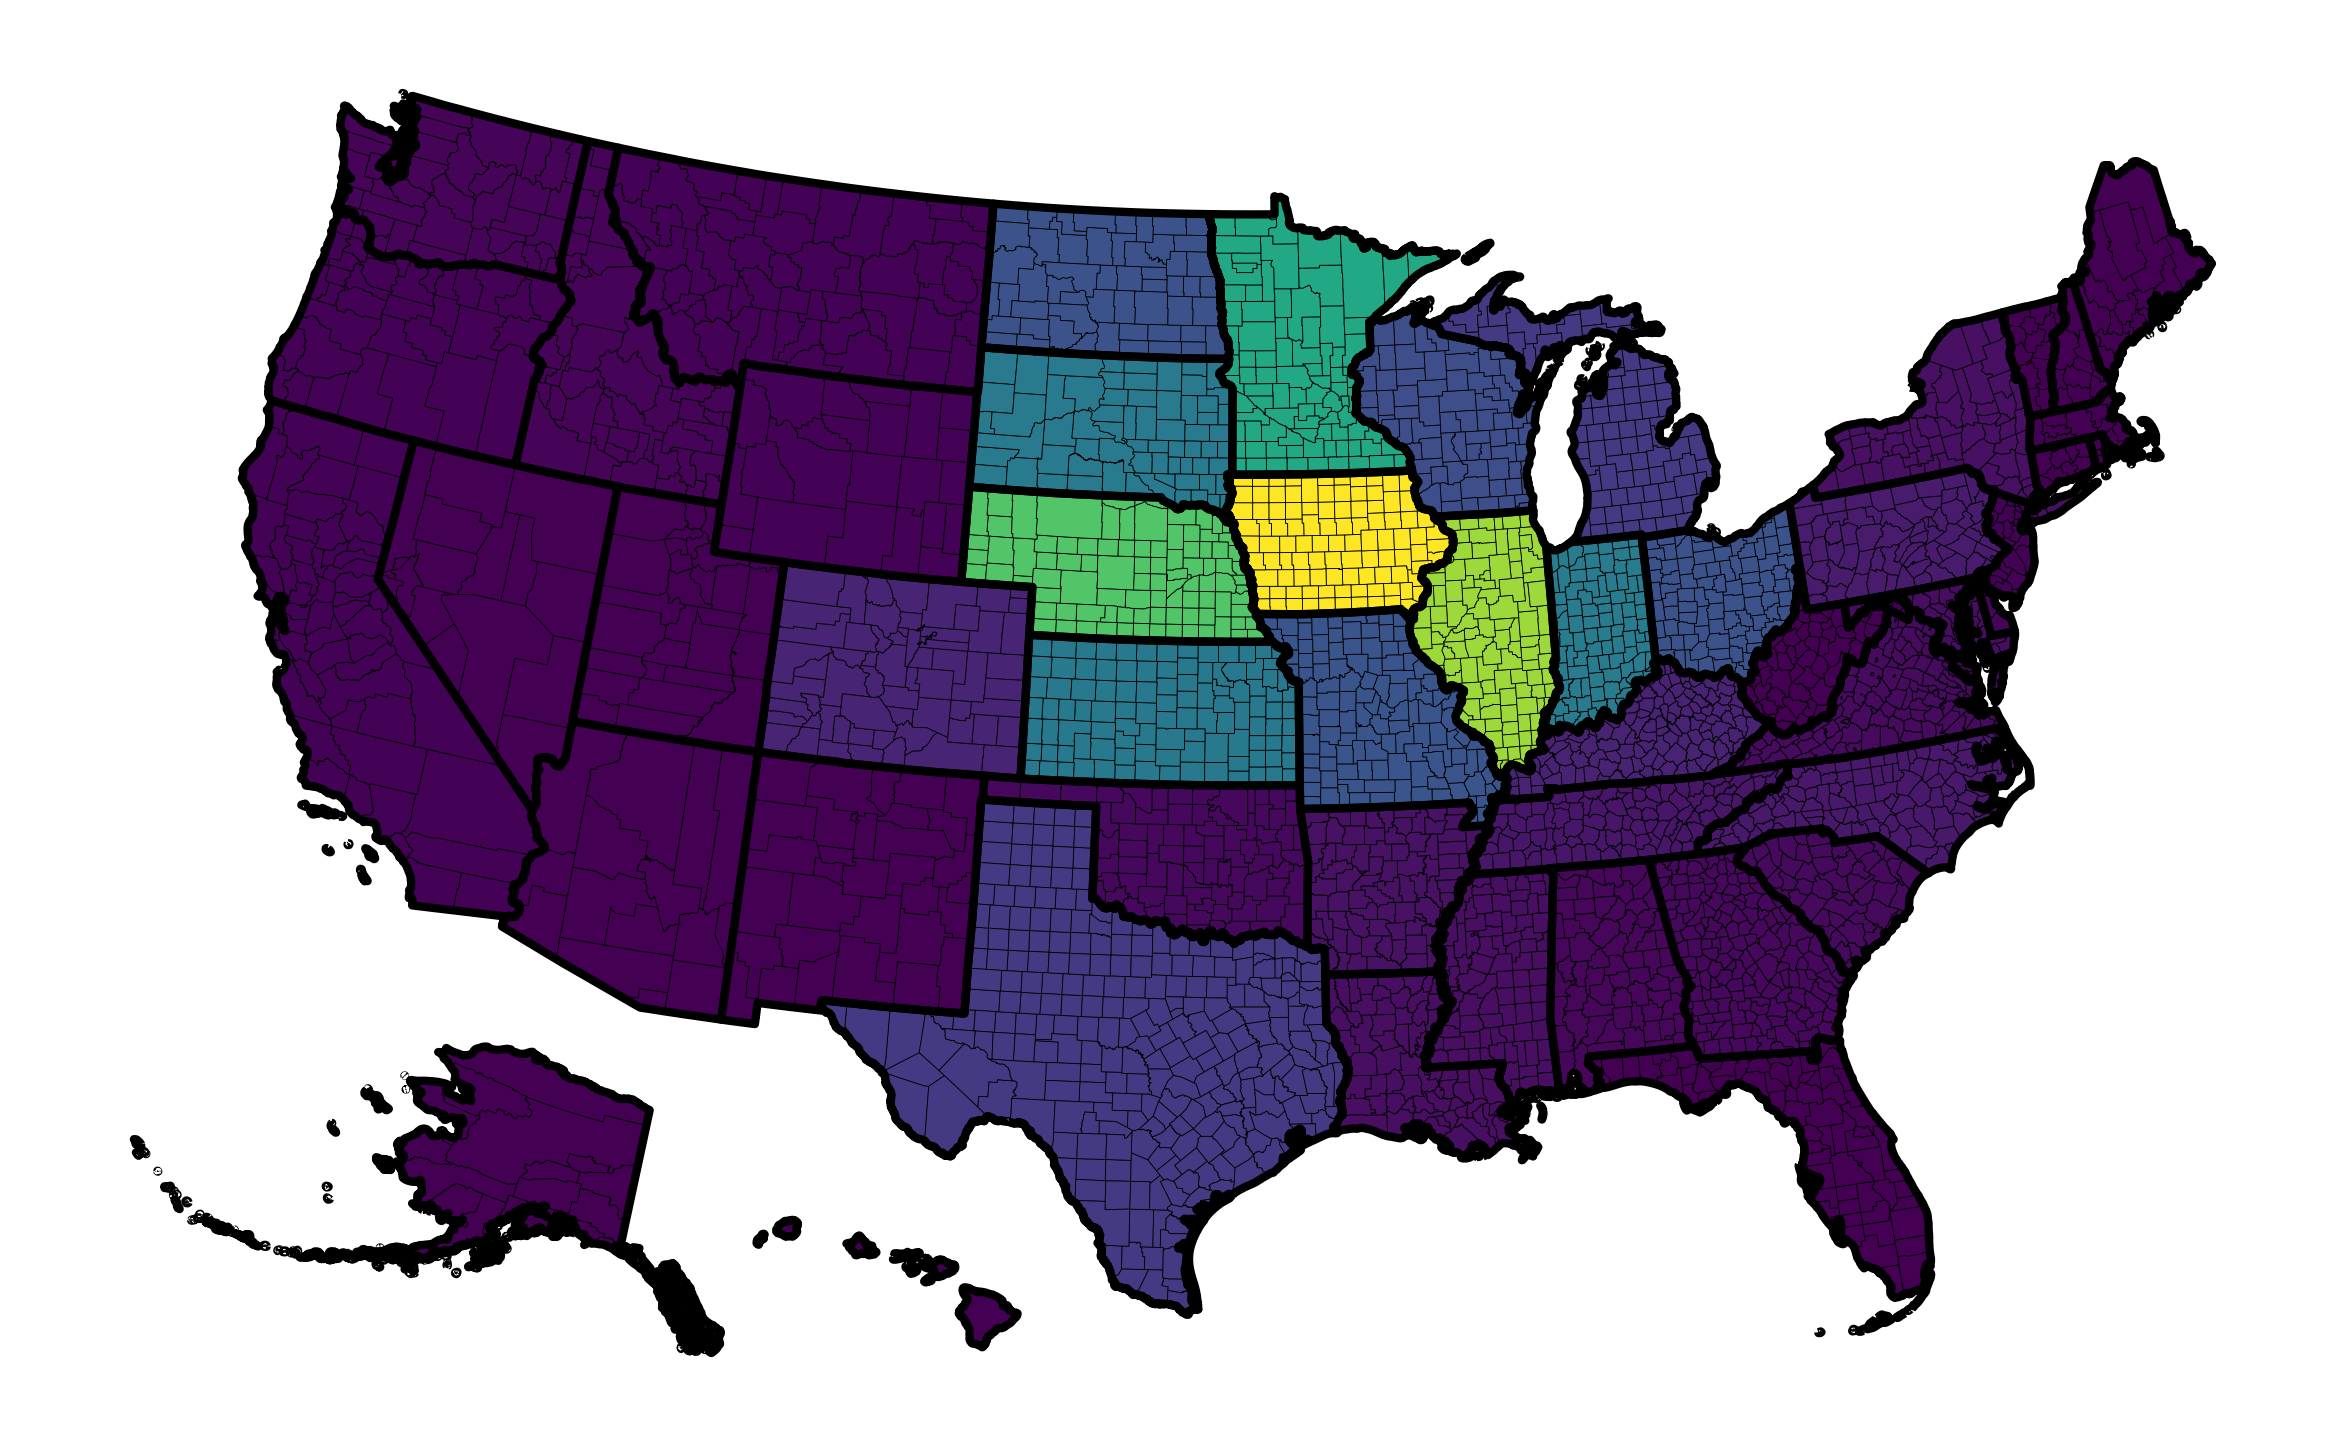

In [267]:
#Could do:
#########

state_gdf = state_merged_gdf.dissolve(by='STATEFP')

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), dpi=300)

state_merged_gdf.plot(ax=ax1, column = 'Value', edgecolor='black', linewidth=.2)
state_gdf.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=2)

ax1.set_axis_off()

#### And reminder on selecting:

<AxesSubplot: >

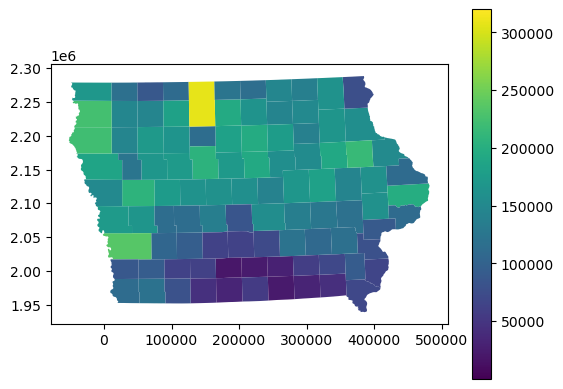

In [269]:
#Suppose we just want Iowa:
####
iowa_gdf = merged_gdf.loc[merged_gdf['STATEFP'] == '19']

#Note the vmin, vmax arguments:
iowa_gdf.plot(column='Value', vmin = merged_gdf.Value.min(), vmax = merged_gdf.Value.max(), legend=True)

#### Prettying up the colorbar!

- Can use either `make_axes_locatable` or `inset_axes`

<AxesSubplot: >

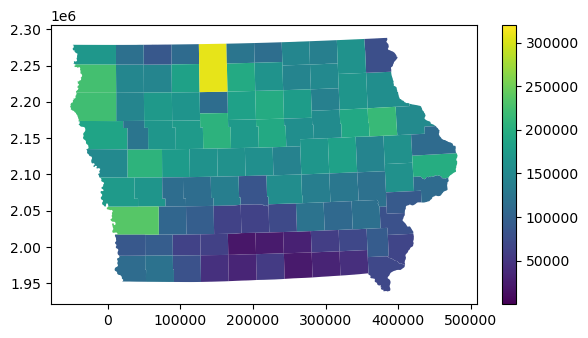

In [270]:
#To pretty up the colorbar:
################
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

#Pretty colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="3.25%", pad=0.25)

iowa_gdf = merged_gdf.loc[merged_gdf['STATEFP'] == '19']

#Note the vmin, vmax arguments:
iowa_gdf.fillna(0).plot(ax=ax1, column='Value', vmin = merged_gdf.Value.min(), vmax = merged_gdf.Value.max(),
              cax=cax1, legend=True)


<AxesSubplot: >

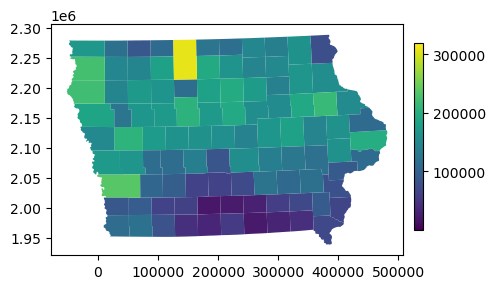

In [271]:
#Use inset_axes
###############
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax1 = plt.subplots(1, 1, figsize=[6, 3])

#Make an inset axes for the colorbar axis
axins1 = inset_axes(ax1, width="2.5%", height="90%", bbox_to_anchor=(0.075,0.05,1,.9),
        bbox_transform=ax1.transAxes)

#Could set width > height and use:
#axins1.xaxis.set_ticks_position("bottom")

iowa_gdf = merged_gdf.loc[merged_gdf['STATEFP'] == '19']

##Plot again:
iowa_gdf.plot(ax=ax1, column='Value', vmin = merged_gdf.Value.min(), vmax = merged_gdf.Value.max(),
              cax=axins1, legend=True)


## Load Global Fossil + Cement Carbon Emissions Series

- CDIAC-FF global emissions data series
    - https://zenodo.org/record/4281271/

<br>

- Several categories of emissions:
    - Solid (Coal)
    - Liquid (Oil)
    - Gas
    - Cement
    - Flaring
    
<br>

- Units: Million Metric Tons of C (per year)

In [272]:
#Get the global series:
####

#To download, we'll need:
#####
from urllib import request

#URL:
url_name = 'https://zenodo.org/record/4281271/files/global.1751_2017.csv?download=1'

#Let's go ahead and download...
#Change this path as needed
global_file = r'Data/global.1751_2017.csv'

#Download and save
#request.urlretrieve(url_name, global_file)

In [273]:
#Try Loading:
####
df_global = pd.read_csv(global_file)

df_global

,Global Carbon Dioxide emissions from fossil fuel consumption and cement production,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"D. Gilfillan, G. Marland, T. Boden, and R. ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global carbon dioxide emissions from 1751 to 2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,Total carbon emissions from fossil fuel consum...,Carbon emissions from solid fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from gas fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of ca...
4,1751,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
266,2013,9568,4086,3233,1808,377,63,1.33
267,2014,9595,4060,3269,1816,385,65,1.32
268,2015,9623,3985,3339,1851,383,65,1.31
269,2016,9674,3915,3400,1899,390,69,1.28


In [275]:
#Let's clean this up a bit:
#######

#Let's convert our names:
name_list = ['Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita']

df_global = pd.read_csv(global_file, header = 4, names = name_list)
df_global.tail()


,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita
262,2013,9568,4086,3233,1808,377,63,1.33
263,2014,9595,4060,3269,1816,385,65,1.32
264,2015,9623,3985,3339,1851,383,65,1.31
265,2016,9674,3915,3400,1899,390,69,1.28
266,2017,9790,3944,3429,1958,384,76,1.29


Text(0, 0.5, 'Annual Emmission (GtC)')

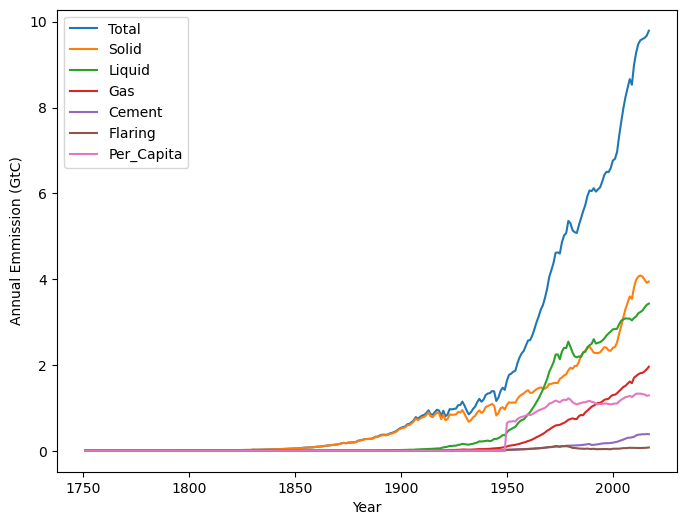

In [276]:
#Now plot:
######
fig1, ax1 = plt.subplots(1, 1, figsize=(8,6))

#Convert to billion metric tons per year
df_global.iloc[:,1:7] = df_global.iloc[:,1:7] / 1e3

#Plot the global yearly emissions series:
df_global.plot(x = 'Year', ax = ax1)

ax1.set_ylabel('Annual Emmission (GtC)')

In [277]:
#Let's take the cumulative sums and look at our time-series...
#####
df_global_cumulative = df_global.copy()

#Don't want to sum over Year:
df_global_cumulative.iloc[:,1:8] = df_global.iloc[:,1:8].cumsum()

#Also, drop Per_Capita as meaningless:
df_global_cumulative = df_global_cumulative.drop(columns = ['Per_Capita'])

Text(0, 0.5, 'Cumulative Emissions, GtC')

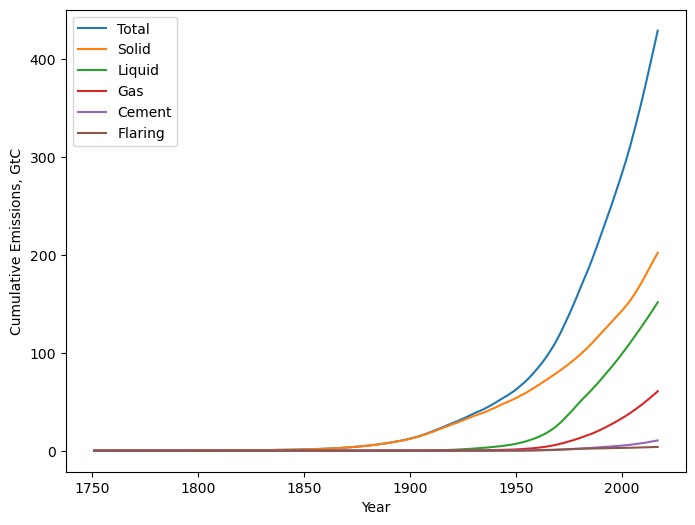

In [280]:
#Plot
fig1, ax1 = plt.subplots(1, 1, figsize=(8,6))

#df_global_cumulative[['Total', 'Year']].plot(x = 'Year', ax = ax1)
df_global_cumulative.plot(x = 'Year', ax = ax1)

ax1.set_ylabel('Cumulative Emissions, GtC')

In [282]:
### Maximum cumulative emissions?
########

np.amax(df_global_cumulative)

Year       2017.000
Total       429.218
Solid       202.299
Liquid      151.734
Gas          60.810
Cement       10.495
Flaring       3.886
dtype: float64

### Plotting With Pandas

Can specify `kind` argument to `plot()` method, with options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots

In [284]:
#For plots below, we'll use DateTimes
#Example:

pd.to_datetime(['2000'], format="%Y")

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq=None)

In [285]:
#Convert Year to a datetime first:
import datetime
from matplotlib.dates import DateFormatter

#Let's get our datetime array:
x = pd.to_datetime(df_global['Year'].values.astype(str), format="%Y")
x

DatetimeIndex(['1751-01-01', '1752-01-01', '1753-01-01', '1754-01-01',
               '1755-01-01', '1756-01-01', '1757-01-01', '1758-01-01',
               '1759-01-01', '1760-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', length=267, freq=None)

In [286]:
#And overwrite Year in our DataFrame:
df_global['Year'] = x

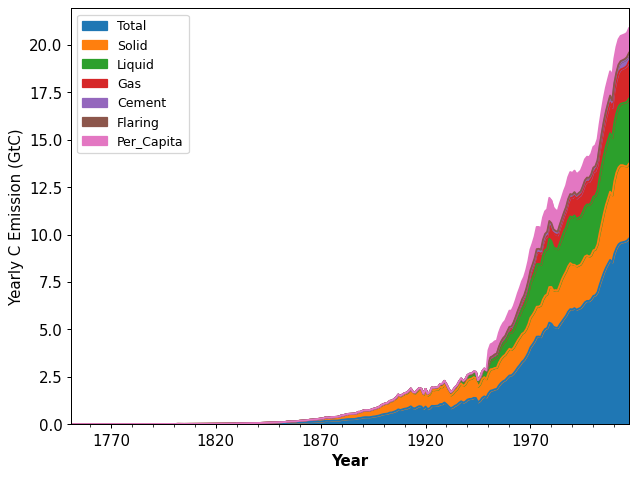

In [287]:
#Let's do an area plot: Global emissions time-series
#######

fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

df_global.plot(x = 'Year', kind = 'area', ax = ax1)

#Let's set labels and fontsizes:
fs = 12
ax1.set_xlabel('Year', fontsize=fs, fontweight='bold')
ax1.set_ylabel('Yearly C Emission (GtC)', fontsize=fs)

ax1.tick_params(axis='both', labelsize=fs)

#Want to exclude Total and Per_Capita, can do:

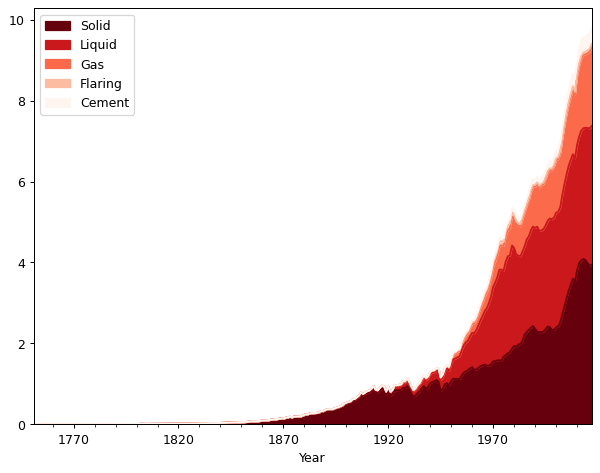

In [291]:
#But we don't want Total or Per_Capita!!
#Let's exclude:

df = df_global.loc[:, df_global.columns.difference(['Total', 'Per_Capita'])]

#Or:
#df = df_global.drop(columns = ['Total', 'Per_Capita'])


fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

#Plot: Can change the colormap to various options:
#Also, note how we set the order of plotting:

df[['Year', 'Solid', 'Liquid', 'Gas', 'Flaring', 'Cement']].plot(x = 'Year', kind = 'area', ax = ax1, cmap='Reds_r'); #Reds_r

In [292]:
df

,Cement,Flaring,Gas,Liquid,Solid,Year
0,0.000,0.000,0.000,0.000,0.003,1751-01-01
1,0.000,0.000,0.000,0.000,0.003,1752-01-01
2,0.000,0.000,0.000,0.000,0.003,1753-01-01
3,0.000,0.000,0.000,0.000,0.003,1754-01-01
4,0.000,0.000,0.000,0.000,0.003,1755-01-01
...,...,...,...,...,...,...
262,0.377,0.063,1.808,3.233,4.086,2013-01-01
263,0.385,0.065,1.816,3.269,4.060,2014-01-01
264,0.383,0.065,1.851,3.339,3.985,2015-01-01
265,0.390,0.069,1.899,3.400,3.915,2016-01-01


<AxesSubplot: xlabel='Year'>

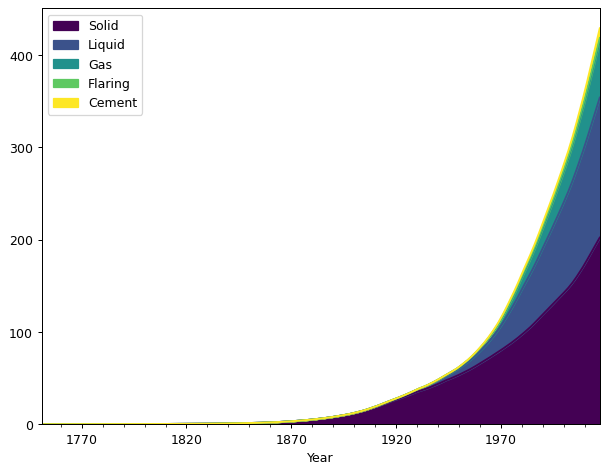

In [293]:
#And cumsum:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

#Let's preserve year here:
df_cumulative = df.copy()
df_cumulative.iloc[:,:-1] = df.iloc[:,:-1].cumsum()

#And plot:
df_cumulative[['Year', 'Solid', 'Liquid', 'Gas', 'Flaring', 'Cement']].plot(x = 'Year', kind = 'area',
                                                                            ax = ax1, cmap='viridis')

### Finally, melt + a pie chart...

- Let's make a pie chart of emissions in the most recent year:

In [296]:
#To get the last row, as a DataFrame:
df.iloc[[-1],:]

,Cement,Flaring,Gas,Liquid,Solid,Year
266,0.384,0.076,1.958,3.429,3.944,2017-01-01


In [297]:
#Let's get a DataFrame that is just our last year
final_emissions = df.iloc[[-1],:]

final_emissions

,Cement,Flaring,Gas,Liquid,Solid,Year
266,0.384,0.076,1.958,3.429,3.944,2017-01-01


We'd like to make a pie chart showing the relative contributions of each fossil type, but `pie()` takes a single column as the `y` argument

Let's `melt`:

In [298]:
df_long = pd.melt(final_emissions, id_vars=['Year'], value_vars=final_emissions.columns[0:5],
        var_name='Category', value_name='Emissions')

df_long

,Year,Category,Emissions
0,2017-01-01,Cement,0.384
1,2017-01-01,Flaring,0.076
2,2017-01-01,Gas,1.958
3,2017-01-01,Liquid,3.429
4,2017-01-01,Solid,3.944


<AxesSubplot: ylabel='Emissions'>

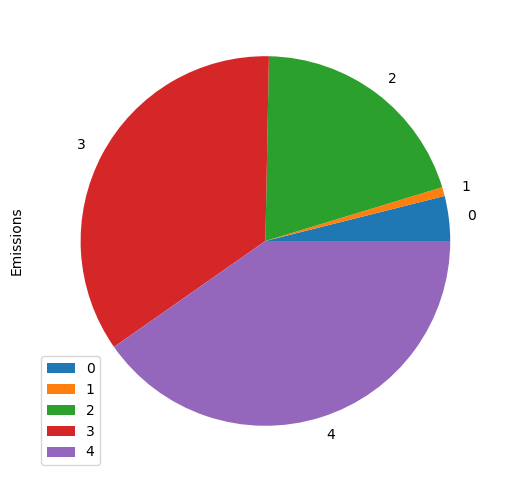

In [299]:
#Plot make our much anticipated pie chart:
df_long.plot.pie(y = 'Emissions', figsize=(6,6))

#Gah! Labels are all wrong

In [300]:
#To fix, let's set our index:
df_long = df_long.set_index('Category')

df_long

,Year,Emissions
Category,,
Cement,2017-01-01,0.384
Flaring,2017-01-01,0.076
Gas,2017-01-01,1.958
Liquid,2017-01-01,3.429
Solid,2017-01-01,3.944


Text(0, 0.5, 'Emissions')

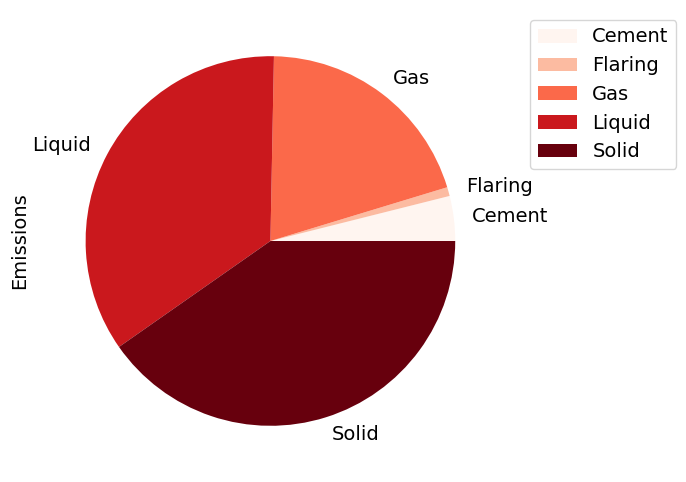

In [301]:
#Plot our even more anticipated pie chart:
fig1, ax1 = plt.subplots(1,1, figsize=(6,6))

df_long.plot.pie(y = 'Emissions', figsize=(6,6), fontsize=14, ax=ax1, cmap='Reds')

#Try with and without this:
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.4, 1))
ax1.set_ylabel('Emissions', fontsize=14)
